importing libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve,plot_roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

reading the data

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Exploratory Data Analysis (EDA):

Checking the shape of the dataset

In [4]:
df.shape 

(7043, 21)


per the observation there are 7043 rows and 21 coloumns

Checking the info about data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Data consists of 3 main data types float,integer and object

Checking the list of columns in our data

In [8]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

As per observation 
1)Type, PaperlessBilling, PaymentMethod should be encoded 
2)TotalCharges should be numerical
3)All columns except for SeniorCitizen should be encoded to numerical.


checking the null values

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

as per the observation there are no null values

Checking if any missing values using heat map

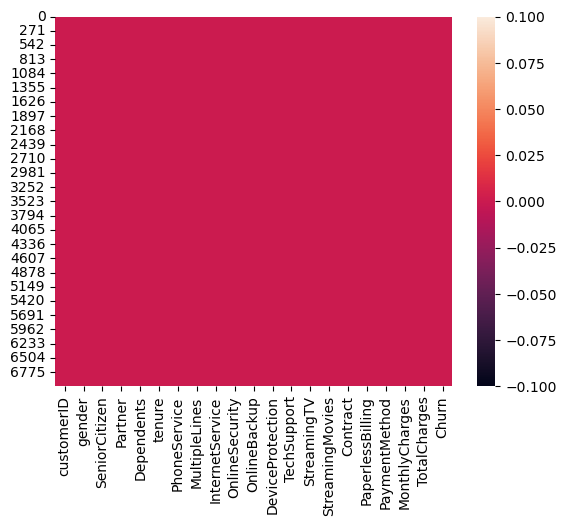

In [9]:
sns.heatmap(df.isnull())
plt.show()

There are no missing values

Since the customer ID is the index it's unique so no duplicated rows hence will drop the coloumn

In [10]:
df=df.drop(["customerID"],axis=1)

checking if coloumn is dropped

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Again checking the datatype of the dataset

In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

As we can see that we have object,integer and float datatypes.
TotalCharges is a float datatype but in our dataset it is as object type hence we will the change the datatype.

Converting TotalCharges from object to float type data

In [13]:
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

Checking the info about the dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


As per the observation datatype of Monthly charges is changed to float also there are no null values

Checking unique values of each column

In [15]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

Our target coloumn is Churn so lets check the unique values of the coloumns

In [16]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

THere are two main classes in our target coloumn value ie YES and NO

Lets check the value count of each column to check if there are any unexpected and unwanted entries present.

In [17]:
for i in df.columns:
        print(df[i].value_counts())
        print('*******')

Male      3555
Female    3488
Name: gender, dtype: int64
*******
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
*******
No     3641
Yes    3402
Name: Partner, dtype: int64
*******
No     4933
Yes    2110
Name: Dependents, dtype: int64
*******
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
*******
Yes    6361
No      682
Name: PhoneService, dtype: int64
*******
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
*******
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
*******
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
*******
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
*******
No                     3095
Yes                    2422

Observation :
1.Above are the value counts of each column and we can see thst there are some duplicate entries in MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.
2.Lets with No for No internet Service.If no internet service then there is no MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies.So lets replace all these entries with 'No'.

Grouping in MultipleLines column

In [18]:
df["MultipleLines"].replace("No phone service","No",inplace=True)

Grouping in OnlineSecurity column

In [19]:
df["OnlineSecurity"].replace("No internet service","No",inplace=True)

Grouping in OnlineBackup column

In [20]:
df["OnlineBackup"].replace("No internet service","No",inplace=True)

Grouping in DeviceProtection column

In [21]:
df["DeviceProtection"].replace("No internet service","No",inplace=True)


Grouping in TechSupport column

In [23]:
df["TechSupport"].replace("No internet service","No",inplace=True)

Grouping in StreamingTV column

In [24]:
df["StreamingTV"].replace("No internet service","No",inplace=True)

Grouping in StreamingMovies column

In [25]:
df["StreamingMovies"].replace("No internet service","No",inplace=True)

Checking if any null values in the dataset

In [26]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see that in TotalCharges there are around 11 null values

Lets replace the nan values of TotalCharges column with its meam value

In [27]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

Checking for null values in dataset

In [28]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Checking for null values using heat map

<AxesSubplot:>

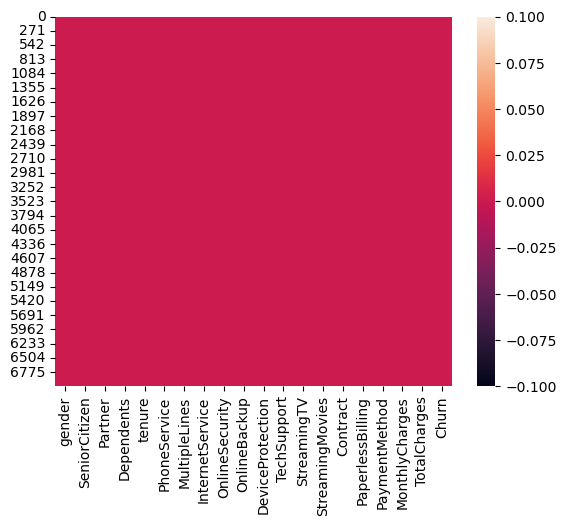

In [29]:
sns.heatmap(df.isnull())

There are no null values in dataset

Checking the statistical overview of the dataset

In [30]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


There is some differnce between the mean and 2nd quantile value which describes there are some outliers.

Data Visualization

Checking for numerical columns

In [31]:
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print('Numerical:',num_col)

Numerical: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


Checking for categorical columns

In [34]:
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print('Categorical:',cat_col,'\n')

Categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 



Univariate Analysis

Visualizing the number of churned customers using countplot

No     5174
Yes    1869
Name: Churn, dtype: int64


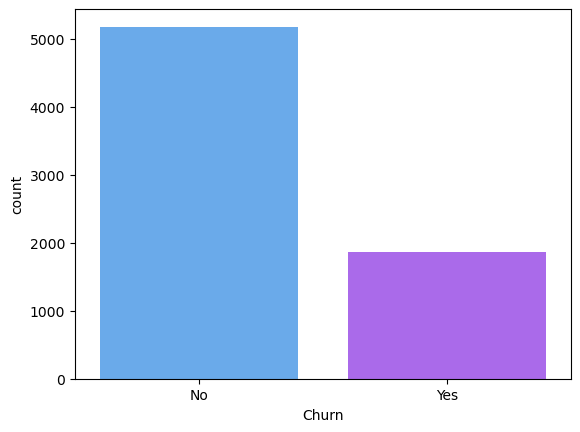

In [35]:
print(df["Churn"].value_counts())
sns.countplot(df["Churn"],palette="cool")
plt.show()

As per the observation we can see that the count of NO in churn are high than compared to YES.Which means there are more number of customers wh have not churned.

Plotting count plot for gender,partner and seniorcitizen

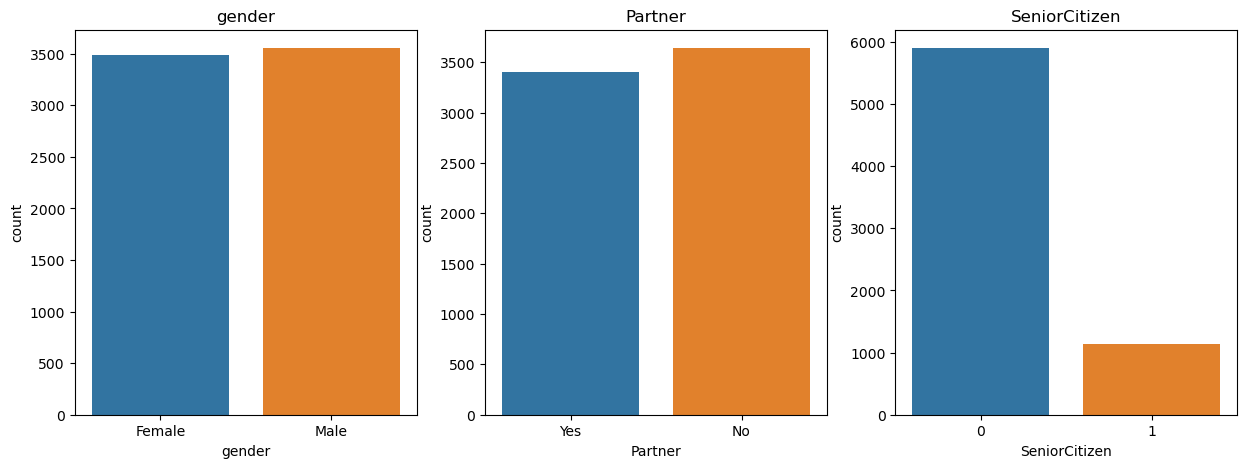

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.title('gender')
sns.countplot(df['gender'])
plt.subplot(1,3,2)
plt.title('Partner')
sns.countplot(df['Partner'])
plt.subplot(1, 3, 3)
plt.title('SeniorCitizen')
sns.countplot(df['SeniorCitizen'])
plt.show()

As per the observation both gender have almost same count.
In senior citizen plot we can see that thee is low numbers.

Ploting pie chart to visualize the count of dependents

No     4933
Yes    2110
Name: Dependents, dtype: int64


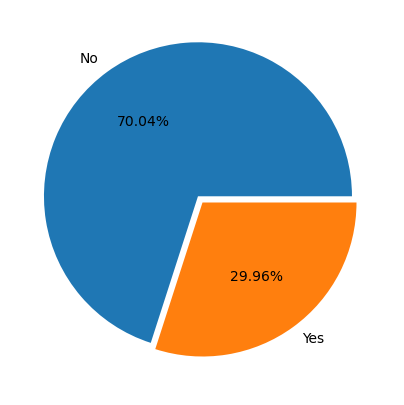

In [37]:
print(df['Dependents'].value_counts())
labels='No','Yes'
fig, ax = plt.subplots(figsize=(5,5))
colors=["tab:green","darkorange"]
ax.pie(df['Dependents'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,explode=(0.05,0))
plt.show()

70% of customers do not have any dependents where as 29.96% have dependents .The customers who have dependents are less then those who don't have any dependent.

Visualizing the number of customers who have phone services

Yes    6361
No      682
Name: PhoneService, dtype: int64


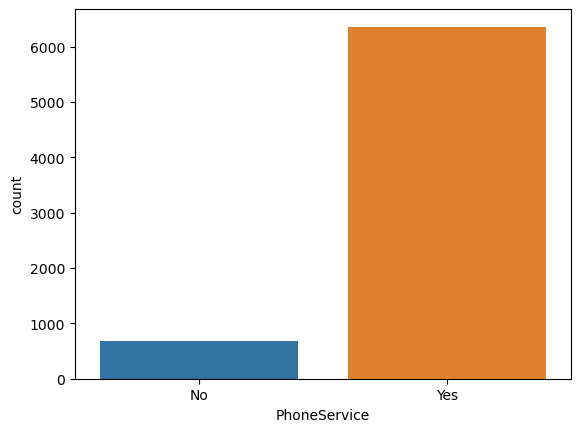

In [38]:
print(df["PhoneService"].value_counts())
sns.countplot(df["PhoneService"])
plt.show()

As per the above chart we can see that there are more people who use phoneservice

Visualizing the number of customers who have internet services

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


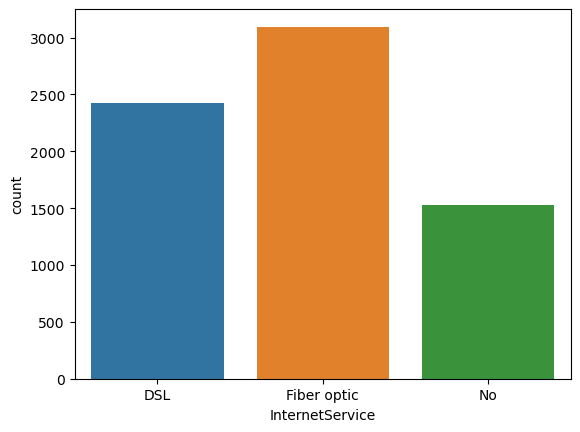

In [39]:
print(df["InternetService"].value_counts())
sns.countplot(df["InternetService"])
plt.show()

As per the observation many customers have fibre optic internet service and less customer are there who don't have any internet service

Visualizing the number of customers who have OnlineSecurity

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64


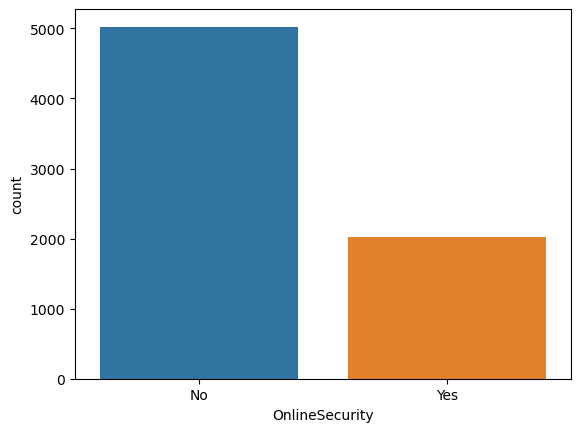

In [40]:
print(df["OnlineSecurity"].value_counts())
sns.countplot(df["OnlineSecurity"])
plt.show()

The majority of customers who have internet services but they do not have any online security.

Visualizing the number of customers who have Online Backup

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64


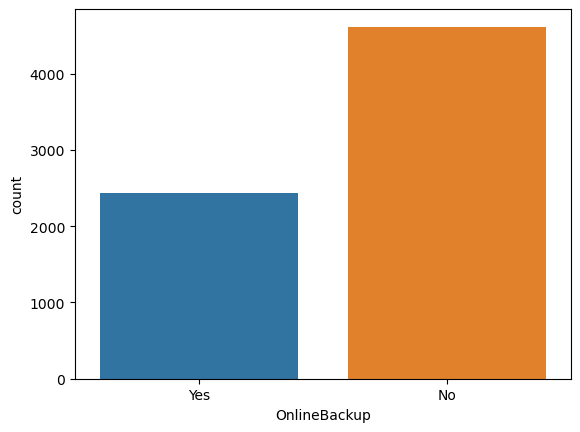

In [41]:
print(df["OnlineBackup"].value_counts())
sns.countplot(df["OnlineBackup"])
plt.show()

We can see that most of the customers don't have any online backup

Visualizing the number of customers who have DeviceProtection

No     4621
Yes    2422
Name: DeviceProtection, dtype: int64


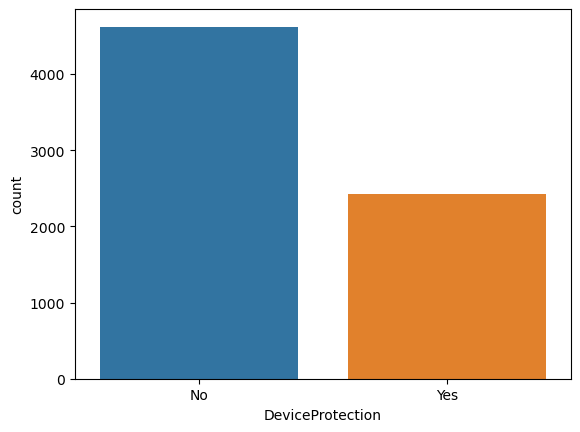

In [42]:
print(df["DeviceProtection"].value_counts())
sns.countplot(df["DeviceProtection"])
plt.show()

We can see that many of customers do not have device protection

Visualizing the number of customers who have TechSupport

No     4999
Yes    2044
Name: TechSupport, dtype: int64


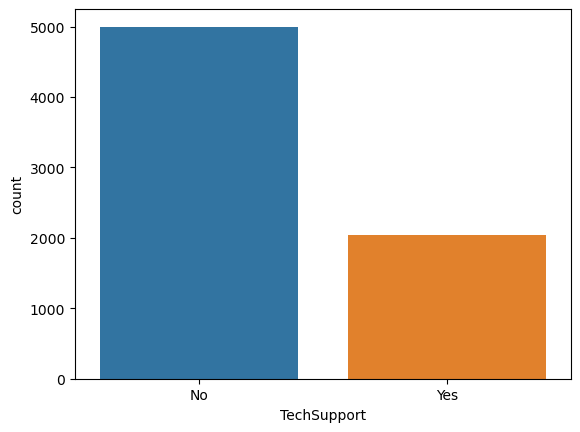

In [43]:
print(df["TechSupport"].value_counts())
sns.countplot(df["TechSupport"])
plt.show()

We can see that many of the customers do not have techsupport

Visualizing the number of customers who have StreamingTV

No     4336
Yes    2707
Name: StreamingTV, dtype: int64


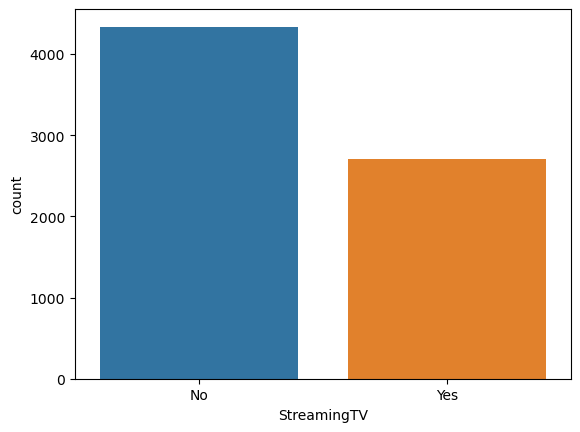

In [44]:
print(df["StreamingTV"].value_counts())
sns.countplot(df["StreamingTV"])
plt.show()

We can see that not much customers have Streaming TV

Visualizing the number of customers who have PaymentMethod

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


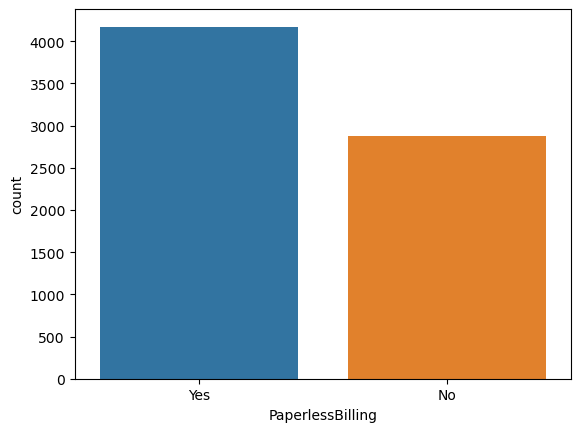

In [45]:
print(df["PaperlessBilling"].value_counts())
sns.countplot(df["PaperlessBilling"])
plt.show()

We can see that many of the customers have paperless billing

Visualizing how many customers have Contract

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


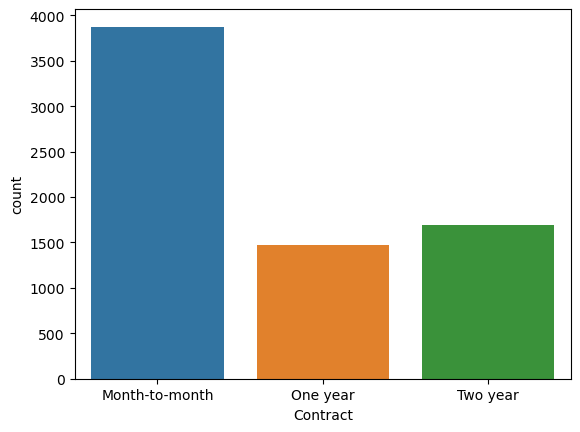

In [46]:
print(df["Contract"].value_counts())
sns.countplot(df["Contract"])
plt.show()

We can see that mmost of the customers have moth to month contract as compared to one year and two year contract

Visualizing how many customers have PaymentMethod

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


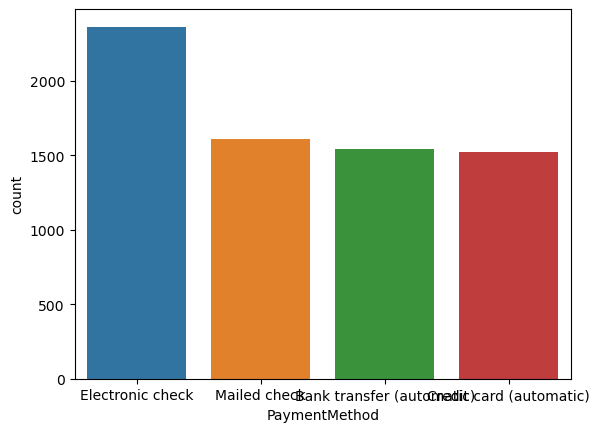

In [47]:
print(df["PaymentMethod"].value_counts())
sns.countplot(df["PaymentMethod"])
plt.show()

We cansee that most if the customers prefer electronic check rather than other paymayent mode

Bivariate Analysis

Lets compare tenure and senior citizen using stripplot

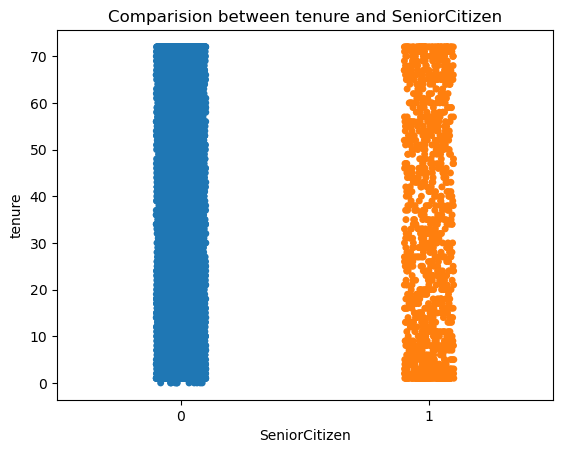

In [48]:
plt.title("Comparision between tenure and SeniorCitizen")
sns.stripplot( x = "SeniorCitizen",y = "tenure", data = df)
plt.show()

Almost both have equal length

Comparing gender and MonthlyCharges 

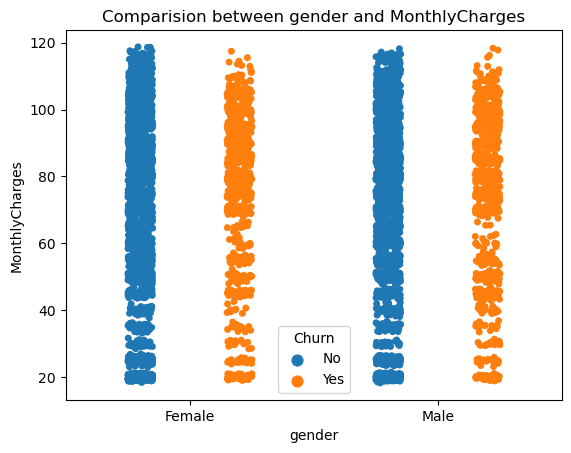

In [49]:
plt.title("Comparision between gender and MonthlyCharges")
sns.stripplot( x = "gender",y = "MonthlyCharges", data = df,hue="Churn",split=True)
plt.show()

Both male and female customers with monthly charges above 60 have high chances of getting churned

Comparing gender and SeniorCitizen on the basis of churn

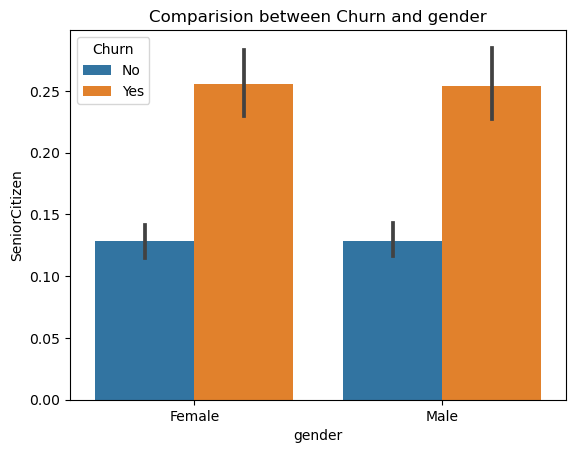

In [50]:
plt.title("Comparision between Churn and gender")
sns.barplot( x = "gender",y = "SeniorCitizen", data = df,hue="Churn")
plt.show()

There is no difference between both the gender hence churn remains unaffected

Multivariate Analysis:

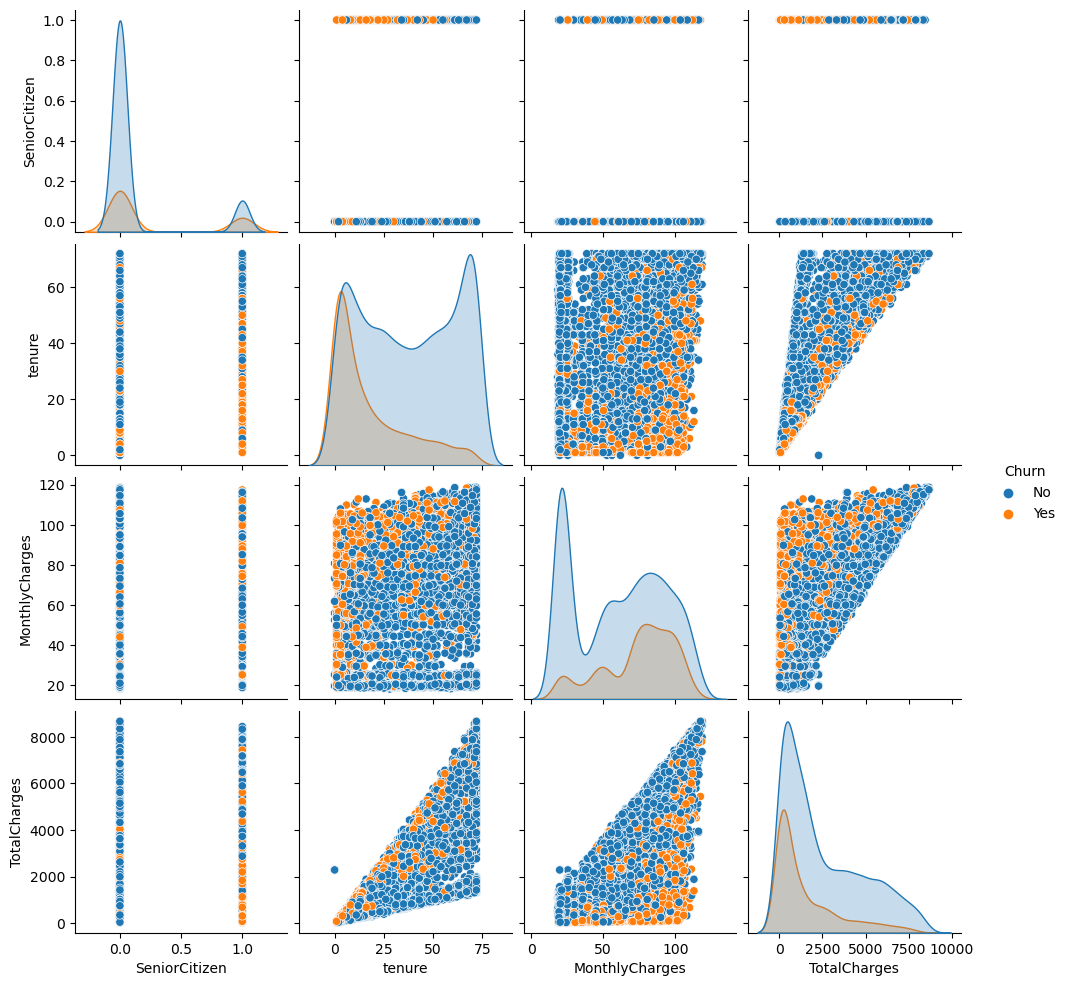

In [52]:
sns.pairplot(df,hue="Churn")
plt.show()

The pairplot gives the pairwise relation between the features on the basis of the target "Churn". On the diagonal we can notice the distribution plots.
The features tenure and TotalCharges, Monthlycharges and TotalCharges have strong linear relation with each other.
There are no outliers in any of the columns but let's plot box plot to identify the outliers.

Pre-processing Data:

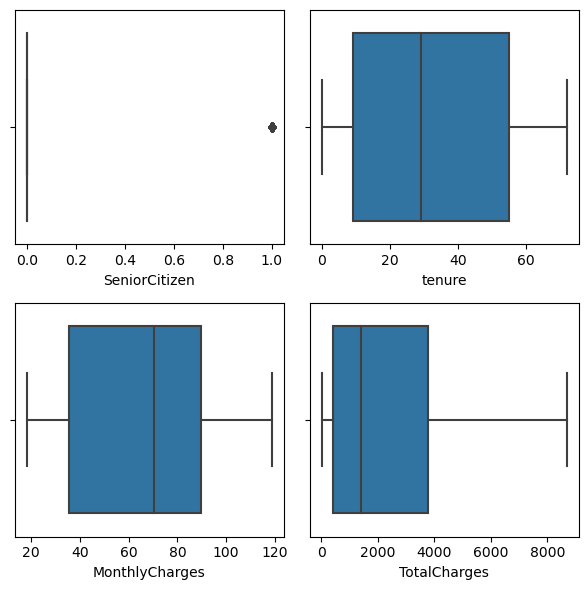

In [53]:
plt.figure(figsize=(6,6),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Senior Citizen has outliers but it contains categorical data so no need to remove outliers. 

Skewness

In [54]:
df.skew().sort_values()

MonthlyCharges   -0.220524
tenure            0.239540
TotalCharges      0.962394
SeniorCitizen     1.833633
dtype: float64

The columns SeniorCitizen and TotalCharges have skewness in the data. Since SeniorCitizen is categorical no need to remove skewness but in TotalCharges. Since TotalCharges is continuous in nature, lets use cube root method to remove skewness.

Removing skewness using square root method

In [55]:
df["TotalCharges"] = np.cbrt(df["TotalCharges"])

Again checking the skeewness

In [56]:
df.skew().sort_values()

MonthlyCharges   -0.220524
TotalCharges      0.011168
tenure            0.239540
SeniorCitizen     1.833633
dtype: float64

Encoding the categorical columns using Ordinal Encoding

In [57]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

In [58]:
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


We have converted the categorical columns into numerical columns

Description of dataset

In [59]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.872923,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.737796,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


Checking Correlation between the target variable and independent variables using heat map.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0, 0.5, 'gender'),
  Text(0, 1.5, 'SeniorCitizen'),
  Text(0, 2.5, 'Partner'),
  Text(0, 3.5, 'Dependents'),
  Text(0, 4.5, 'tenure'),
  Text(0, 5.5, 'PhoneService'),
  Text(0, 6.5, 'MultipleLines'),
  Text(0, 7.5, 'InternetService'),
  Text(0, 8.5, 'OnlineSecurity'),
  Text(0, 9.5, 'OnlineBackup'),
  Text(0, 10.5, 'DeviceProtection'),
  Text(0, 11.5, 'TechSupport'),
  Text(0, 12.5, 'StreamingTV'),
  Text(0, 13.5, 'StreamingMovies'),
  Text(0, 14.5, 'Contract'),
  Text(0, 15.5, 'PaperlessBilling'),
  Text(0, 16.5, 'PaymentMethod'),
  Text(0, 17.5, 'MonthlyCharges'),
  Text(0, 18.5, 'TotalCharges'),
  Text(0, 19.5, 'Churn')])

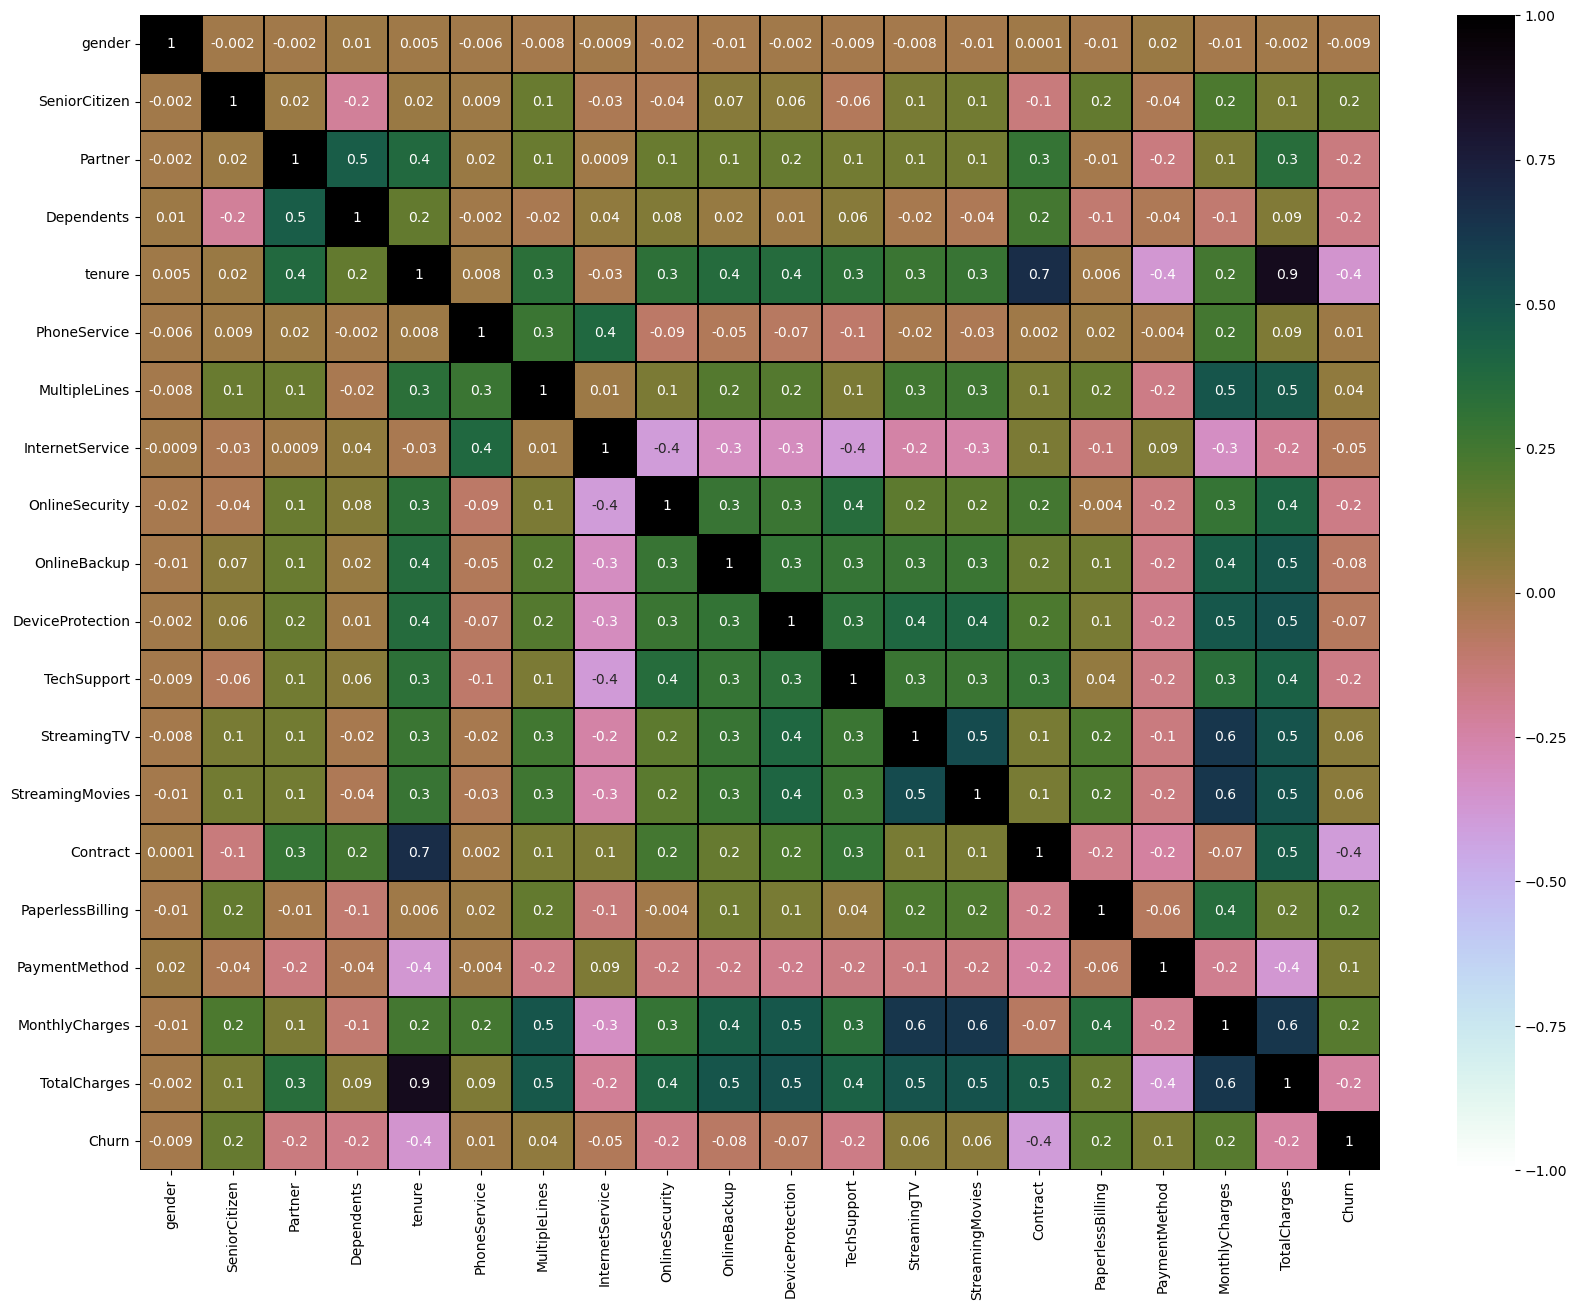

In [62]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="cubehelix_r")
plt.yticks(rotation=0)

Heatmap shows the correlation matrix by visualizing the data.We can see the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.
There is no much positive correlation between the target and features.
The columns MonthlyCharges, PaperlessBilling, SeniorCitizen and PaymentMethod have positive collrelation with the label Churn.
The label is negatively correlated with Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner and Dependents.
Also the column gender has very less correlation with the label, we can drop it if necessary.

In [63]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
StreamingTV         0.063228
StreamingMovies     0.061382
MultipleLines       0.040102
PhoneService        0.011942
gender             -0.008612
InternetService    -0.047291
DeviceProtection   -0.066160
OnlineBackup       -0.082255
Partner            -0.150448
Dependents         -0.164221
TechSupport        -0.164674
OnlineSecurity     -0.171226
TotalCharges       -0.233781
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

Visualizing the correlation between label and features

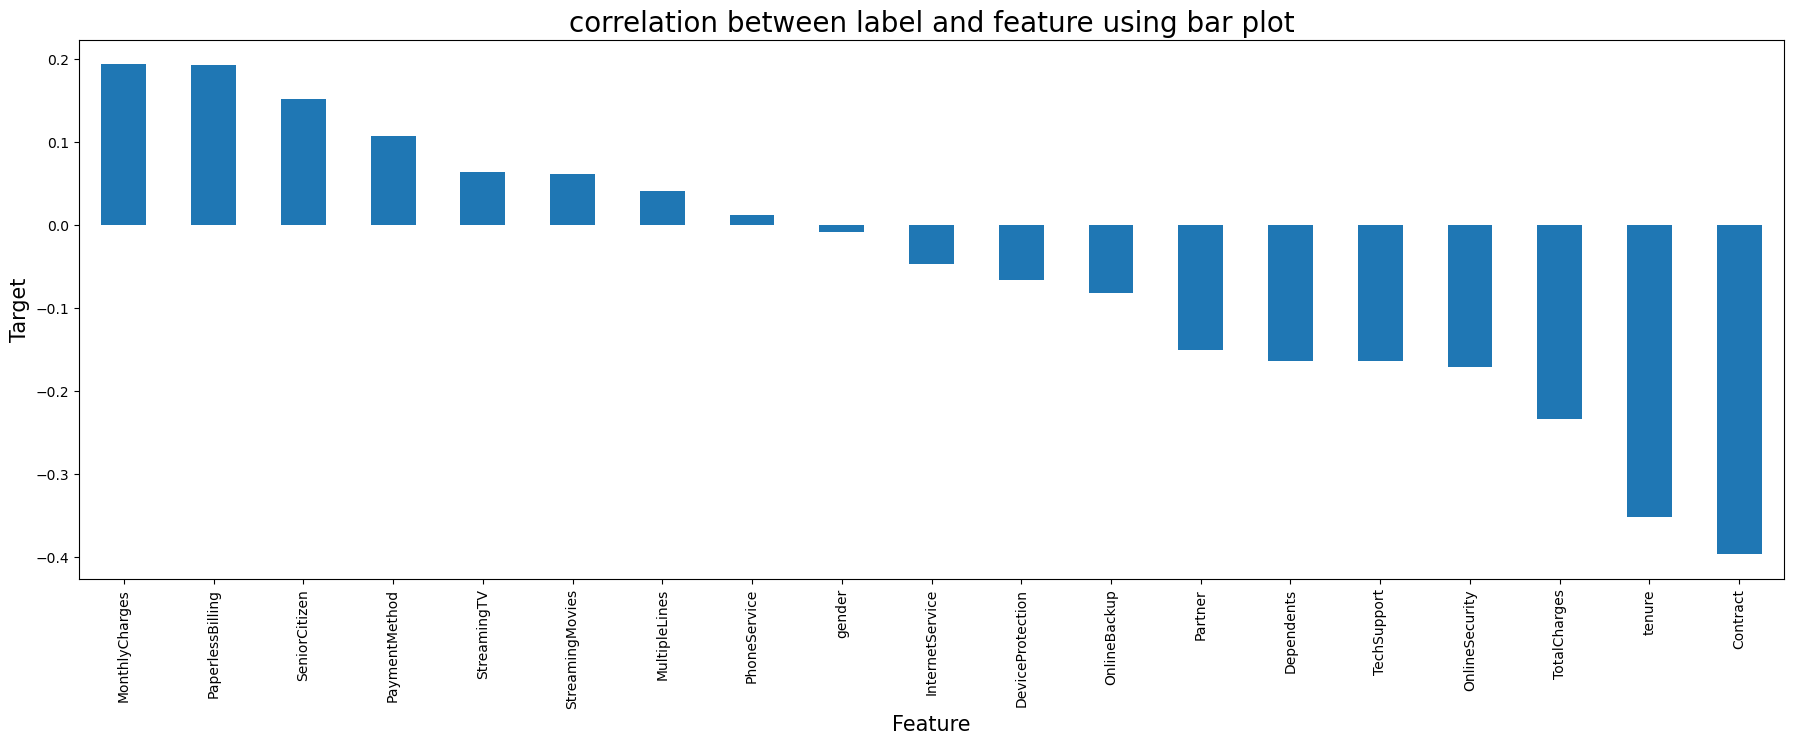

In [65]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and the target. Here the features gender and PhoneService have very less correlation with the column.

Separating the feature and label into x and y

In [66]:
x = df.drop("Churn", axis=1)
y = df["Churn"]

Standard Scalarization for feature scaling

In [67]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,-0.854176,-1.183234,-0.633933,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.854176,-1.183234,1.577454,-0.725563,1.381277,-0.639439,-0.790132,-0.796070,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,-1.183234,1.577454,1.378241,-0.723968,-0.639439,-0.790132,-0.796070,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,-0.854176,-1.183234,1.577454,-0.725563,1.381277,1.563872,-0.790132,-0.796070,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.854176,0.172250,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.170719,-1.183234,1.577454,-0.725563,1.381277,1.563872,1.265612,1.256171,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.170719,0.172250,-0.633933,1.378241,1.381277,-0.639439,1.265612,1.256171,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,-0.854176,-1.183234,1.577454,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.170719,0.172250,-0.633933,-0.725563,-0.723968,-0.639439,-0.790132,-0.796070,-0.828207,0.829798,1.334863,0.320338,-0.942642


Checking Multi-Colinearity

In [68]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

In [69]:
# Let's check the values
vif

,VIF values,Features
0,1.001712,gender
1,1.149673,SeniorCitizen
2,1.462976,Partner
3,1.383916,Dependents
4,12.357689,tenure
5,1.712629,PhoneService
6,1.548863,MultipleLines
7,1.904736,InternetService
8,1.476713,OnlineSecurity
9,1.480046,OnlineBackup


By checking VIF value we can find the features which causing multicollinearity problem. Here we can find the feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with the other features. We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF(above 10).

Dropping TotalCharges column

In [70]:
x.drop("TotalCharges",axis=1,inplace=True)

Again checking VIF value to confirm whether the multicollinearity still exists or not

In [71]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

In [72]:
vif

,VIF values,Features
0,1.001700,gender
1,1.149607,SeniorCitizen
2,1.460871,Partner
3,1.382066,Dependents
4,2.754518,tenure
5,1.712012,PhoneService
6,1.538487,MultipleLines
7,1.897435,InternetService
8,1.464039,OnlineSecurity
9,1.469031,OnlineBackup


Per observation multicollinearity does not exists

Oversampling(SMOTE)

In [73]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [74]:
y.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

Model Building:

In [81]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8669887278582931  on Random_state  132


train_test split

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

Using Logestic Regression

In [83]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

# Prediction
predlr = lr.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

0.7884057971014493
[[1188  363]
 [ 294 1260]]
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.78      1551
         1.0       0.78      0.81      0.79      1554

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



We have got an accuracy score of 79% with logestic regression

Random Forest Classifier

In [84]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

0.8634460547504026
[[1333  218]
 [ 206 1348]]
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1551
         1.0       0.86      0.87      0.86      1554

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



We have got an accuracy score of 86% with the Random Forest Classifier

Support Vector Machine

In [85]:
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8135265700483092
[[1202  349]
 [ 230 1324]]
              precision    recall  f1-score   support

         0.0       0.84      0.77      0.81      1551
         1.0       0.79      0.85      0.82      1554

    accuracy                           0.81      3105
   macro avg       0.82      0.81      0.81      3105
weighted avg       0.82      0.81      0.81      3105



We have got an accuracy score of 81% with the SVC model

cross validation score

In [86]:
# cv score for Logistic Regression
print('Logistic Regression:',cross_val_score(lr,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier:',cross_val_score(rf,x,y,cv=5).mean())

# cv score for Support Vector Machine Classifier
print('Support Vector Machine Classifier:',cross_val_score(svc,x,y,cv=5).mean())

Logistic Regression: 0.7720354531933323
Random Forest Classifier: 0.8520594560138972
Support Vector Machine Classifier: 0.8015126913746284


Wecan see that Random Forest Classifier is the best fit model